In [1]:
# download&install anaconda python
# optional: shell cmd "conda create" in case a different Python version is needed
# shell cmd "pip install cma" to install a CMA-ES module (or see github)
# shell cmd "jupyter-notebook" and click on scaling-experiment
from __future__ import division, print_function  # only necessary in Python 2
%pylab nbagg
import ast
import collections as cs
import cma

Populating the interactive namespace from numpy and matplotlib


__Question__: how effective is CMA actually?

In [2]:
xopt, es = cma.fmin2(cma.ff.elli, 5 * [1], 1, {
    'ftarget':1e-7,
    'CMA_on': 1,
});

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=609997, Sat Jul 14 10:38:11 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 4.888394846482079e+04 1.0e+00 9.56e-01  8e-01  1e+00 0:00.1
    2     16 4.502342240485800e+04 1.3e+00 8.45e-01  8e-01  9e-01 0:00.1
    3     24 3.728348635226047e+05 1.3e+00 8.23e-01  7e-01  8e-01 0:00.1
  100    800 7.802069026057704e-02 9.3e+02 4.03e-02  2e-04  2e-01 0:00.2
  155   1240 7.828369767264853e-08 1.1e+03 1.96e-04  2e-07  2e-04 0:00.3
termination on ftarget=1e-07 (Sat Jul 14 10:38:11 2018)
final/bestever f-value = 9.969771e-08 7.828370e-08
incumbent solution: [7.1161648960606206e-05, -4.607498793627379e-05, -2.5416882679972047e-06, 6.5225249388526889e-07, 8.7109337211557339e-08]
std deviation: [0.00016900809341850013, 2.4901761826979248e-05, 4.6931483072124571e-06, 1.0790741201022241e-06, 1.8044201884504725e-07]


<IPython.core.display.Javascript object>


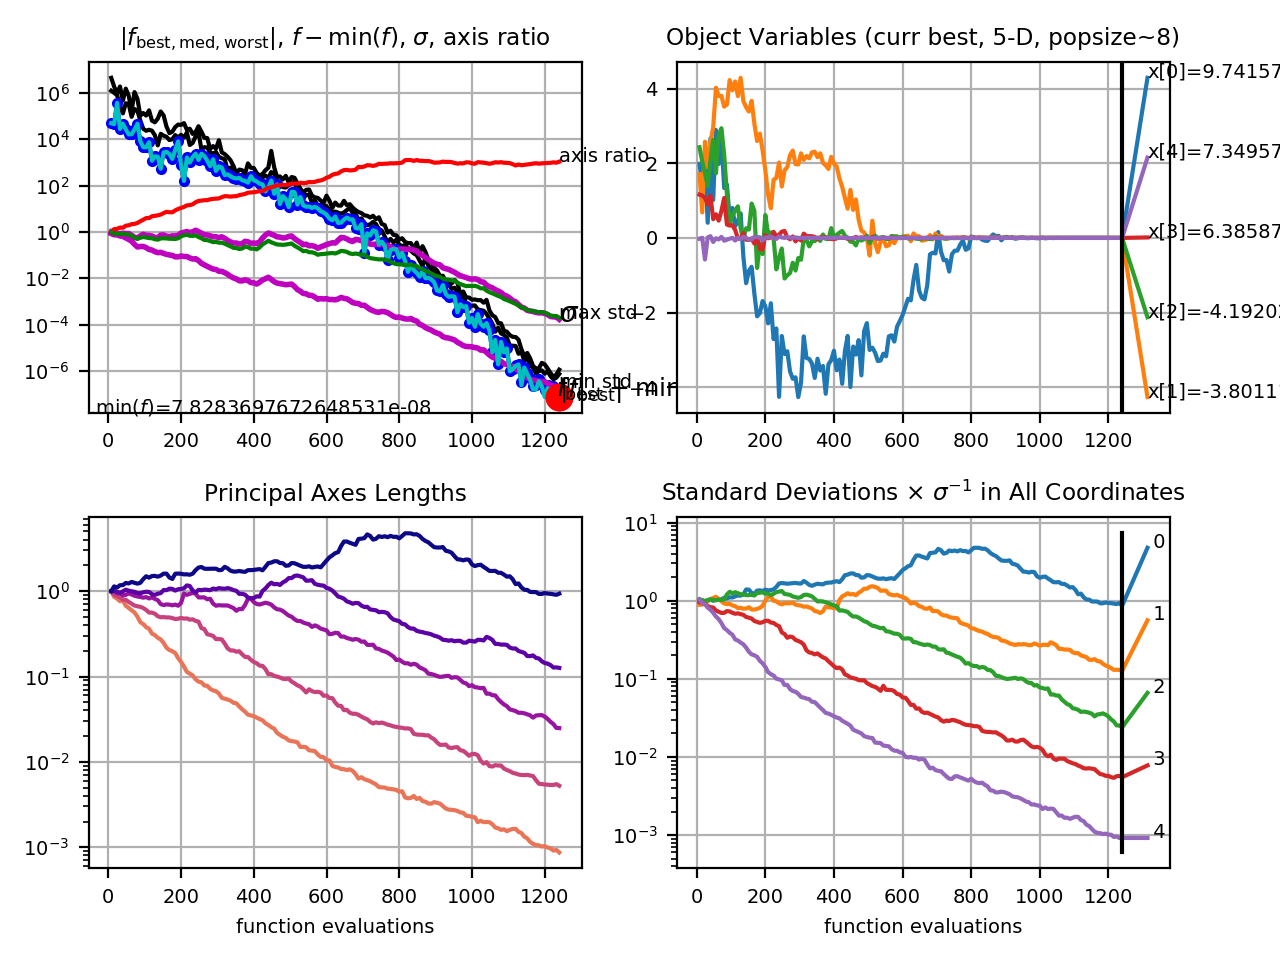

In [3]:
cma.plot();

In [4]:
es.sm.C

array([[  7.40680894e-01,   2.10190221e-02,  -3.81839019e-03,
          6.68756406e-04,  -1.89769451e-04],
       [  2.10190221e-02,   1.60796387e-02,  -3.86873678e-04,
          1.65009296e-04,   1.45888017e-05],
       [ -3.81839019e-03,  -3.86873678e-04,   5.71142784e-04,
         -3.55376280e-05,   2.48732039e-06],
       [  6.68756406e-04,   1.65009296e-04,  -3.55376280e-05,
          3.01938637e-05,   2.32511414e-07],
       [ -1.89769451e-04,   1.45888017e-05,   2.48732039e-06,
          2.32511414e-07,   8.44289702e-07]])

Take Home Messages
------------------
- make quick experiments
- display everything nicely (in particular conveniently readable)
- learn how to read graphs
  - check displayed x- and y-ranges
- direct visual comparison is powerful

__Question__: how does the dependency on the `CMA_on` factor actually look like?

__Remark__: `CMA_on` is a multiplier for the learning rate of the covariance matrix

In [5]:
dimension = 3
evals = cs.defaultdict(list)
stops = cs.defaultdict(list)
if 11 < 3:
    with open('_evals-%dD.py' % dimension, 'rt') as file:
         evals.update(ast.literal_eval(file.read()))
    with open('_stops-%dD.py' % dimension, 'rt') as file:
        stops.update(ast.literal_eval(file.read()))

In [ ]:
factors = [1, 2, 1/2, 4, 1/4, 8, 1/8, 1/16, 1/32, 1/64]
for irun in range(3):
    for factor in factors:
        es = cma.CMAEvolutionStrategy(dimension * [1], 1, {
            'ftarget': 1e-9,
            'verbose':-9,
            'CMA_on': factor
        })
        try:
            es.optimize(cma.ff.elli)
        except:
            print('!', end='')
        evals[factor] += [es.result.evaluations]
        stops[factor] += [es.stop()]
        print(factor, evals[factor][-1], end=' | ')
        with open('_evals-%dD.py' % dimension, 'wt') as file:
            file.write(repr(dict(evals)))
        with open('_stops-%dD.py' % dimension, 'wt') as file:
            file.write(repr(dict(stops)))

Take Home Messages
-----------------
- we can conduct a meaningful parameter investigation (sweep) from scratch(!) in 20-or-so minutes
- writing and reading data in Python (in particular built-in data types) is a piece of cake
- always make crosschecks about the consistency of any data again and again